In [265]:
words = open('names.txt', 'r').read().splitlines()

In [266]:
special = '.'
chars = sorted(list((set(''.join(words)))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi[special] = 0
itos = {i:s for s, i in stoi.items()}

In [267]:
import torch

In [268]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [269]:
for w in words:
    characters = [special] + list(w) + [special]
    for ch1, ch2 in zip(characters, characters[1:]):
        # numerical representation of character
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        # increment counter in coordinates of related "bigram"
        N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

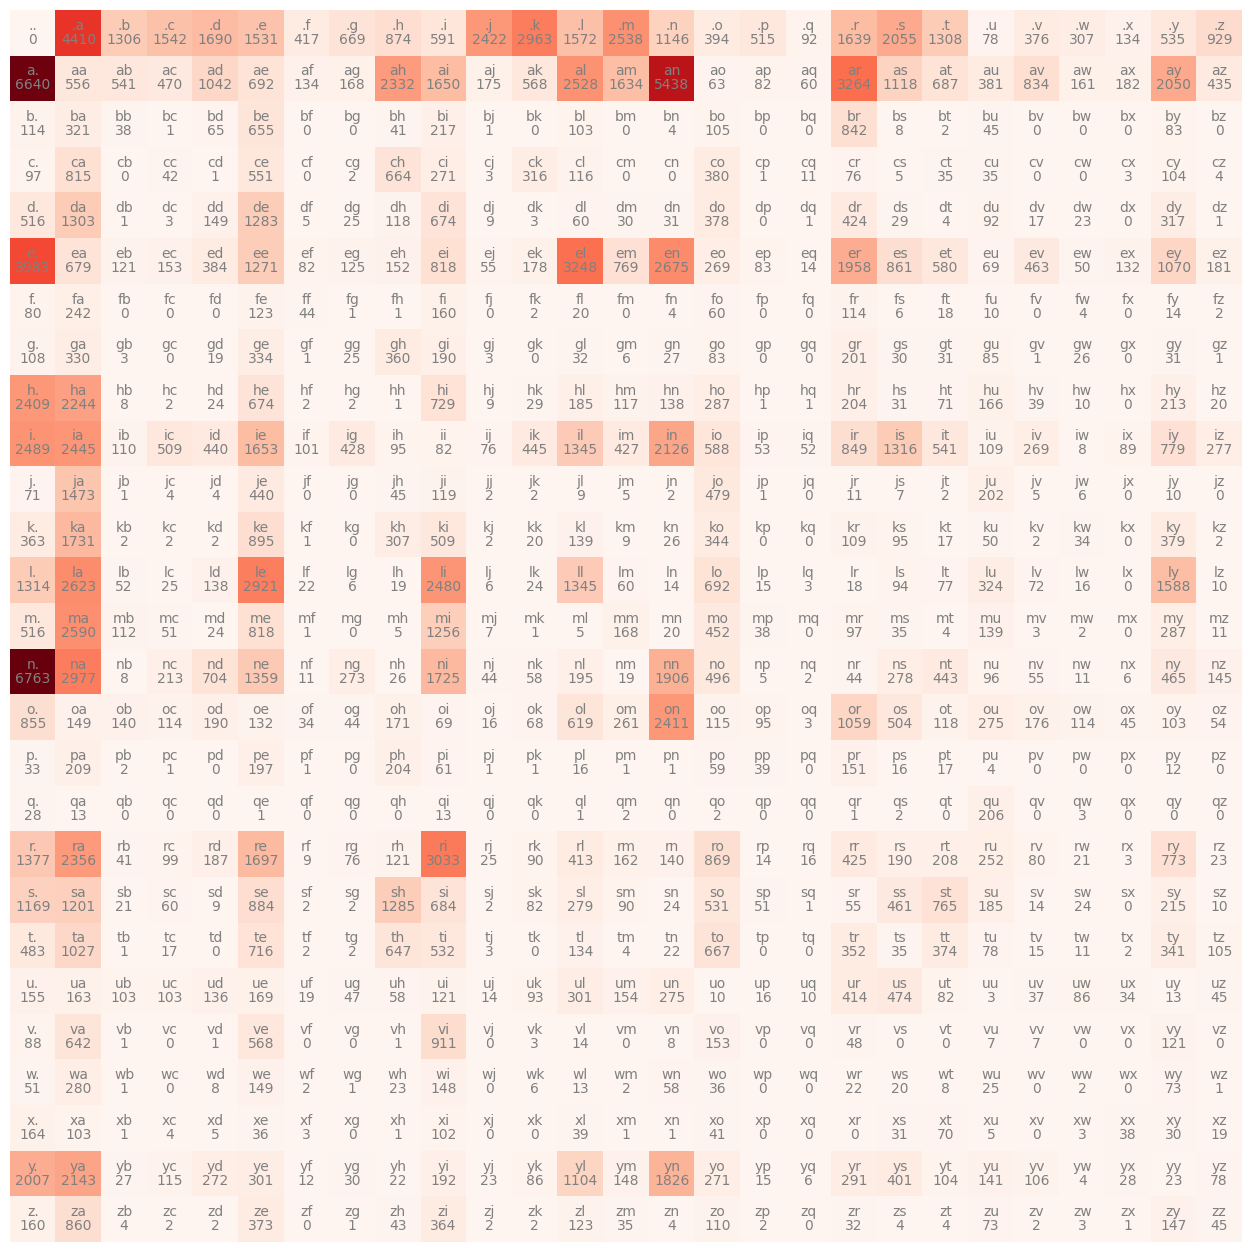

In [270]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Reds')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        style_props = {"ha":"center",  "color":"gray"}
        plt.text(j, i, chstr, **style_props, va="bottom")
        plt.text(j, i, N[i, j].item(), **style_props, va="top")
plt.axis('off')

In [271]:
P = N.float()

# normalize each each element in each row with respect to
# all other elements in the same row
# e.g. X = [
#            [1,2,3],
#            [1,1,1],
#          ]
# dimension = 1 <-- columns
# X = X / X.sum(dimenstion, keepdim=True)
# X
# [
#    [0.16, 0.33, 0.5],
#    [0.33, 0,33, 0,33]
# ]

P = P / P.sum(1, keepdim=True)

In [273]:
g = torch.Generator().manual_seed(2147483647)

In [274]:
for _ in range(20):
    index = 0
    name = ''
    names = []
    while True:
        p = P[index]
        index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name += itos[index]
        if index == 0:
            names.extend(name)
            break

    print(''.join(names))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [275]:
log_likelihood = 0.0
n = 0
for w in words:
    characters = [special] + list(w) + [special]
    for ch1, ch2 in zip(characters, characters[1:]):
        # numerical representation of character
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

nll = -log_likelihood
print(f'{nll/n}')

2.454094171524048


In [276]:
# lets create a training set of bigrams (x, y)
xs, ys = [], []

for w in words:
    chs = [special] + list(w) + [special]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [277]:
import torch.nn.functional as F

In [285]:
# initialize 27 neurons' weights, each of them receives 27 inputs
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [287]:
# forward pass vvvv
for k in range(200):
    # convert each of the examples from bigrams to one-hot representation
    xenc = F.one_hot(xs, num_classes=27).float()
    # predict log-counts
    logits = xenc @ W
    # counts, equivalent to what we have in N
    counts = logits.exp()
    # probabilities for next character
    probs = counts / counts.sum(1, keepdims=True)
    
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None 
    loss.backward()

    W.data += -50 * W.grad

2.462332248687744
2.462284803390503
2.46223783493042
2.462191104888916
2.4621448516845703
2.4620988368988037
2.4620540142059326
2.4620089530944824
2.4619646072387695
2.461920738220215
2.4618775844573975
2.461834192276001
2.461791753768921
2.461749315261841
2.461707830429077
2.4616663455963135
2.461625337600708
2.4615848064422607
2.4615447521209717
2.4615049362182617
2.461465358734131
2.461426258087158
2.4613876342773438
2.4613494873046875
2.4613115787506104
2.4612739086151123
2.4612364768981934
2.4611997604370117
2.461163282394409
2.4611270427703857
2.4610910415649414
2.461055278778076
2.4610202312469482
2.4609854221343994
2.4609503746032715
2.46091628074646
2.4608821868896484
2.460848569869995
2.460815191268921
2.460782289505005
2.460749387741089
2.460716724395752
2.460684061050415
2.4606523513793945
2.460620641708374
2.4605894088745117
2.4605581760406494
2.460527181625366
2.4604969024658203
2.460466146469116
2.4604363441467285
2.4604063034057617
2.460376739501953
2.4603474140167236
2

In [289]:
for _ in range(20):
    index = 0
    name = ''
    names = []
    while True:
        xenc = F.one_hot(torch.tensor([index]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

        name += itos[index]
        if index == 0:
            names.extend(name)
            break

    print(''.join(names))

moniana.
dun.
cylonsexarilon.
con.
yaeezmidani.
onniusiaynira.
sh.
n.
mavyl.
ayadazlyeniabriad.
ayajatteenn.
yoliela.
mvi.
i.
zorivi.
khnla.
jahie.
colaylies.
el.
phif.
